In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

In [11]:
data = np.fromfile('my_data.dat', dtype='int16')-2**11

mean = np.mean(data)
median = np.median(data)
std = np.std(data)

sec_data = data[400000:400501]



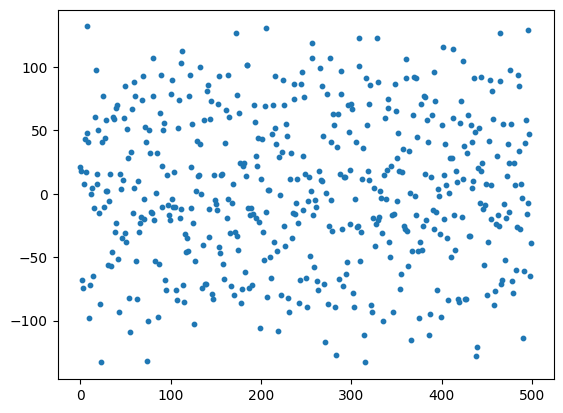

In [21]:
time = np.arange(0,len(sec_data),1)
plt.scatter(time,sec_data, s=10)

(array([1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 2.0000e+00, 3.0000e+00,
        3.0000e+00, 0.0000e+00, 3.0000e+00, 5.0000e+00, 4.0000e+00,
        9.0000e+00, 1.0000e+01, 1.2000e+01, 1.8000e+01, 1.7000e+01,
        2.7000e+01, 4.7000e+01, 5.4000e+01, 1.0700e+02, 2.6100e+02,
        4.6700e+02, 8.0200e+02, 1.4350e+03, 2.3710e+03, 3.7900e+03,
        5.4320e+03, 6.5610e+03, 9.8400e+03, 1.2882e+04, 1.5790e+04,
        1.8931e+04, 2.1137e+04, 2.4381e+04, 2.7241e+04, 2.9523e+04,
        2.6651e+04, 3.3912e+04, 3.6748e+04, 3.8696e+04, 4.0777e+04,
        4.2330e+04, 4.3338e+04, 4.4329e+04, 4.3707e+04, 3.7016e+04,
        4.2328e+04, 4.1176e+04, 3.9030e+04, 3.7243e+04, 3.5034e+04,
        3.2788e+04, 3.0969e+04, 2.8524e+04, 2.2237e+04, 2.4064e+04,
        2.1603e+04, 1.8457e+04, 1.5564e+04, 1.2653e+04, 9.9350e+03,
        7.2160e+03, 4.8870e+03, 2.8250e+03, 2.15

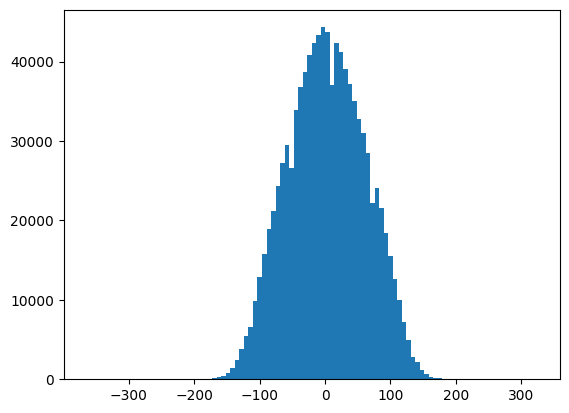

In [19]:
plt.hist(data, bins=100)